In [1]:
import sys
import os
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlrose_hiive as mlrose
import networkx as nx

from src.experiments.TravelingSalesman import TravelingSalesman
from src.experiments.Rastrigin import Rastrigin
from src.experiments.Knapsack import Knapsack

from src.experiments.FitnessByStateSize import FitnessByStateSize
from src.experiments.FitnessLearningCurve import FitnessLearningCurve
from src.experiments.FitnessValidationCurve import FitnessValidationCurve
from src.experiments.EvalOptimizationAlgorithm import EvalOptimizationAlgorithm

from src.models.MIMIC import MIMIC
from src.models.GeneticAlgorithm import GeneticAlgorithm
from src.models.SimulatedAnnealing import SimulatedAnnealing
from src.models.RandomizedHillClimbing import RandomizedHillClimbing

from src.plots.FitnessComparison import FitnessComparison
from src.plots.FitnessValidationCurve import FitnessValidationCurve as FitnessValidationCurvePlot
from src.plots.OptimizationFitTimes import OptimizationFitTimes
from src.plots.FuncCallsByStateSizeComparison import FuncCallsByStateSizeComparison
from src.plots.FitnessCurve import FitnessCurve


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [30]:
rand_hill_climb = RandomizedHillClimbing(
    max_attempts=1000, 
    restarts=800,
    max_iters=np.inf
)
 
sim_ann = SimulatedAnnealing(
    max_attempts=65,
    decay_type='exp',
    init_temp=20,
    exp_const=0.001,
    min_temp=0.0001,
#     schedule=mlrose.ExpDecay(init_temp=10, exp_const=0.001, min_temp=0.00001),
    max_iters=np.inf
)
# GeneticAlgorithm(population_size=400, mutation_prob=0.0001, max_attempts=40, max_iters=np.inf),
gen_alg = GeneticAlgorithm(
    max_attempts=30, 
    population_size=200,
    mutation_prob=0.0001,
    max_iters=np.inf
)

mimic = MIMIC(
    max_attempts=6,
    population_size=400,
    keep_pct=0.01,
    max_iters=np.inf
)

models = [rand_hill_climb, sim_ann, gen_alg, mimic]

In [31]:
state_size_experiments = [
    FitnessByStateSize(
        mod, 
        Knapsack, 
        state_sizes=np.array([5, 15, 45, 60, 75]), 
        verbose=True
    ) for mod in models
]
for exp in state_size_experiments:
    print('\n\nExperiment for {0}\n'.format(exp.model))
    exp.run()



Experiment for <RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>

<RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>
state_size: 5 / best_fitness: 33.0 / fit_time: 12.1215238571167
<RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>
state_size: 15 / best_fitness: 0.0 / fit_time: 11.057711839675903
<RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>
state_size: 45 / best_fitness: 0.0 / fit_time: 11.031977891921997
<RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>
state_size: 60 / best_fitness: 282.0 / fit_time: 11.940415859222412
<RandomizedHillClimbing, restarts: 700, max_attempts: 1000, max_iters: inf>
state_size: 75 / best_fitness: 0.0 / fit_time: 11.124783754348755


Experiment for <SimulatedAnnealing, schedule: None, max_attempts: 65, max_iters: inf>

<SimulatedAnnealing, schedule: None, max_attempts: 65, max_iters: inf>
state_size: 5 / best_fitness: 21.0 /

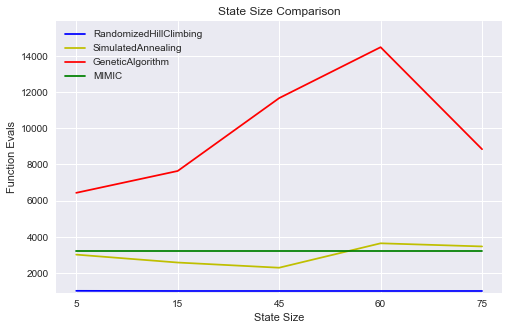

In [32]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments)
fig, ax = func_calls_comp.plot()

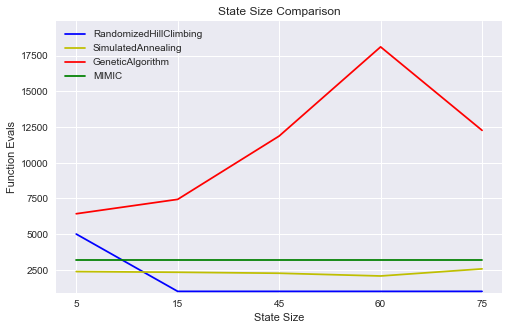

In [29]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments)
fig, ax = func_calls_comp.plot()

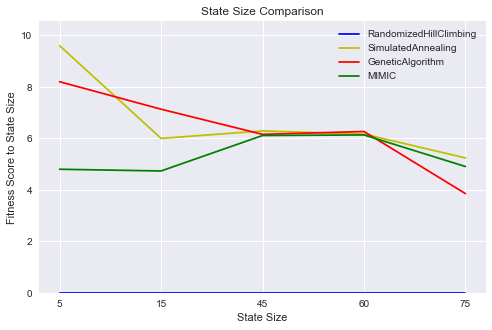

In [25]:
func_calls_comp = FuncCallsByStateSizeComparison(experiments=state_size_experiments, ratio='fitness')
fig, ax = func_calls_comp.plot()

In [19]:
max_iters_experiments = [
    FitnessValidationCurve(
        mod, 
        Knapsack,
        state_size=15,
        param_name='max_iters',
        param_range=np.array([1, 10, 100, 1000, 2000, 4000]),
        trials=4,
        verbose=True
    ) for mod in models
]
for exp in max_iters_experiments:
    exp.run()

<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 1>
max_iters: 1 / best_fitness: 0.0
<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 10>
max_iters: 10 / best_fitness: 8.25
<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 100>
max_iters: 100 / best_fitness: 33.75
<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 1000>
max_iters: 1000 / best_fitness: 64.25
<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 2000>
max_iters: 2000 / best_fitness: 0.0
<RandomizedHillClimbing, restarts: 550, max_attempts: 1000, max_iters: 4000>
max_iters: 4000 / best_fitness: 59.75
<SimulatedAnnealing, schedule: None, max_attempts: 65, max_iters: 1>
max_iters: 1 / best_fitness: 0.0
<SimulatedAnnealing, schedule: None, max_attempts: 65, max_iters: 10>
max_iters: 10 / best_fitness: 46.75
<SimulatedAnnealing, schedule: None, max_attempts: 65, max_iters: 100>
max_iters: 100 / best_fitness: 43.0
<SimulatedAn

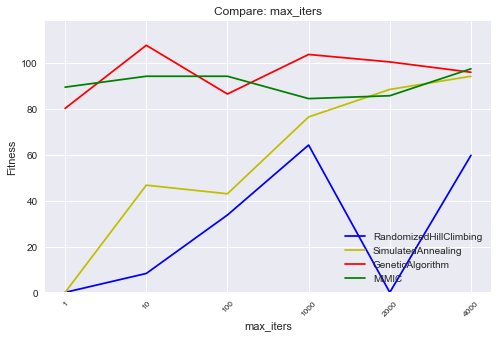

In [21]:
fit_comp = FitnessComparison(experiments=max_iters_experiments)
fig, ax = fit_comp.plot()

<GeneticAlgorithm, population_size: 2, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 2 / best_fitness: 17.2
<GeneticAlgorithm, population_size: 12, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 12 / best_fitness: 75.0
<GeneticAlgorithm, population_size: 22, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 22 / best_fitness: 78.8
<GeneticAlgorithm, population_size: 32, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 32 / best_fitness: 88.8
<GeneticAlgorithm, population_size: 42, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 42 / best_fitness: 93.2
<GeneticAlgorithm, population_size: 52, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 52 / best_fitness: 92.8
<GeneticAlgorithm, population_size: 62, mutation_prob: 0.0001, max_attempts: 10, max_iters: inf>
population_size: 62 / best_fitness: 100.6
<GeneticAlgorithm, population_size:

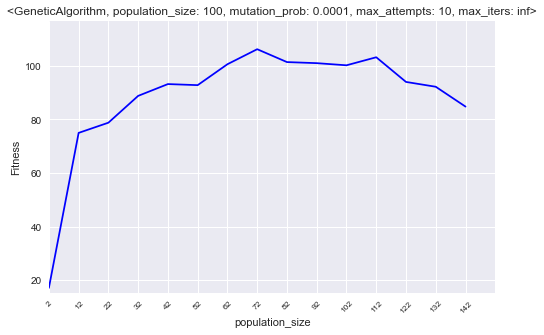

In [22]:
ga_val_curv = FitnessValidationCurve(
    GeneticAlgorithm(population_size=100, mutation_prob=0.0001, max_attempts=10, max_iters=np.inf),
    Knapsack, 
    param_name='population_size',
    param_range=np.arange(2, 150, 10),
    state_size=15,
    trials=5,
    verbose=True
) 
ga_val_curv.run()
ga_val_curv_plot = FitnessValidationCurvePlot(ga_val_curv)
fig, ax = ga_val_curv_plot.plot()

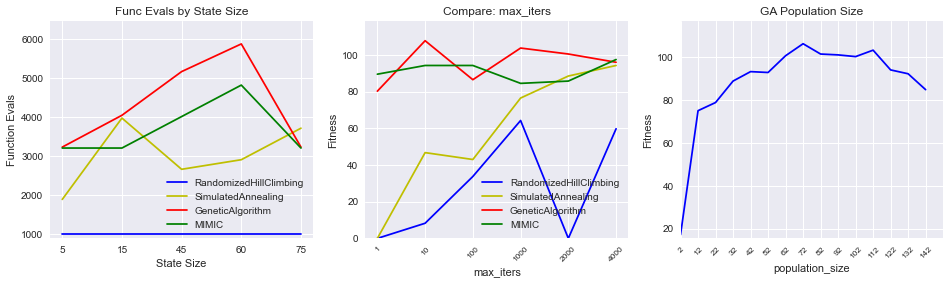

In [23]:
knapsack_fig, axs = plt.subplots(1, 3, figsize=(16, 4))
_, ax = func_calls_comp.plot(ax=axs[0], title="Func Evals by State Size")
_, ax = fit_comp.plot(ax=axs[1])
_, ax = ga_val_curv_plot.plot(ax=axs[2], title="GA Population Size")

In [24]:
knapsack_fig.savefig(
    "../out/Knapsack Results.png",  
    bbox_inches='tight',
    dpi=800
)

## Evaluations

In [ ]:
problem = Knapsack(state_size=15)
eval_experiments = [EvalOptimizationAlgorithm(model, problem, trials=5, verbose=True) for model in models]

In [ ]:
for eval_exp in eval_experiments:
    eval_exp.fit()